In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

df_chromecast = pd.read_csv('dataset_chromecast.csv')
df_smart = pd.read_csv('dataset_smart-tv.csv')

df_chromecast["log(bytes_up)"] = np.where(df_chromecast['bytes_up'] <= 1.0, 0, np.log10(df_chromecast['bytes_up']))
df_chromecast["log(bytes_down)"] = np.where(df_chromecast['bytes_down'] <= 1.0, 0, np.log10(df_chromecast['bytes_down']))

df_smart["log(bytes_up)"] = np.where(df_smart['bytes_up'] <= 1.0, 0, np.log10(df_smart['bytes_up']))
df_smart["log(bytes_down)"] = np.where(df_smart['bytes_down'] <= 1.0, 0, np.log10(df_smart['bytes_down']))

c:\Users\alech\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\alech\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\alech\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\alech\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


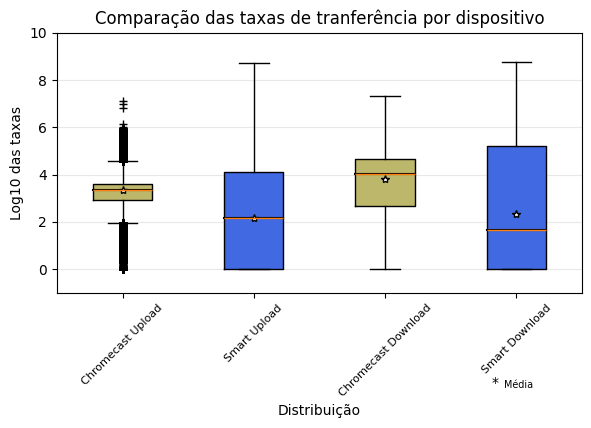

In [113]:
random_dists = ['Chromecast Upload', 'Smart Upload', 'Chromecast Download', 'Smart Download', ]

# Generate some random indices that we'll use to resample the original data
# arrays. For code brevity, just use the same random indices for each array

data = [
    df_chromecast["log(bytes_up)"],
    df_smart["log(bytes_up)"],
    df_chromecast["log(bytes_down)"],
    df_smart["log(bytes_down)"]
]

fig, ax1 = plt.subplots(figsize=(6, 4))
fig.canvas.manager.set_window_title('Boxplot das taxas de transferência')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(data, notch=False, sym='+', vert=True, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set(
    axisbelow=True,  # Hide the grid behind plot objects
    title='Comparação das taxas de tranferência por dispositivo',
    xlabel='Distribuição',
    ylabel='Log10 das taxas',
)

# Now fill the boxes with desired colors
box_colors = ['darkkhaki', 'royalblue']
num_boxes = len(data)
medians = np.empty(num_boxes)
for i in range(num_boxes):
    box = bp['boxes'][i]
    box_x = []
    box_y = []
    for j in range(5):
        box_x.append(box.get_xdata()[j])
        box_y.append(box.get_ydata()[j])
    box_coords = np.column_stack([box_x, box_y])
    # Alternate between Dark Khaki and Royal Blue
    ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % 2]))
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    median_x = []
    median_y = []
    for j in range(2):
        median_x.append(med.get_xdata()[j])
        median_y.append(med.get_ydata()[j])
        ax1.plot(median_x, median_y, 'k')
    medians[i] = median_y[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    ax1.plot(np.average(med.get_xdata()), np.average(data[i]),
             color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
ax1.set_xlim(0.5, num_boxes + 0.5)
top = 10
bottom = -1
ax1.set_ylim(bottom, top)
ax1.set_xticklabels(random_dists,
                    rotation=45, fontsize=8)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
# pos = np.arange(num_boxes) + 1
# upper_labels = [str(round(s, 2)) for s in medians]
# weights = ['bold', 'semibold']
# for tick, label in zip(range(num_boxes), ax1.get_xticklabels()):
#     k = tick % 2
#     ax1.text(pos[tick], .95, upper_labels[tick],
#              transform=ax1.get_xaxis_transform(),
#              horizontalalignment='center', size='x-small',
#              weight=weights[k], color=box_colors[k])

# Finally, add a basic legend
# fig.text(0.80, 0.08, f'{N} Random Numbers',
#          backgroundcolor=box_colors[0], color='black', weight='roman',
#          size='x-small')
# fig.text(0.80, 0.045, 'IID Bootstrap Resample',
#          backgroundcolor=box_colors[1],
#          color='white', weight='roman', size='x-small')
fig.text(0.80, 0.015, '*', color='black', weight='roman', size='medium')
fig.text(0.815, 0.013, ' Média', color='black', weight='roman', size='x-small')

plt.show()

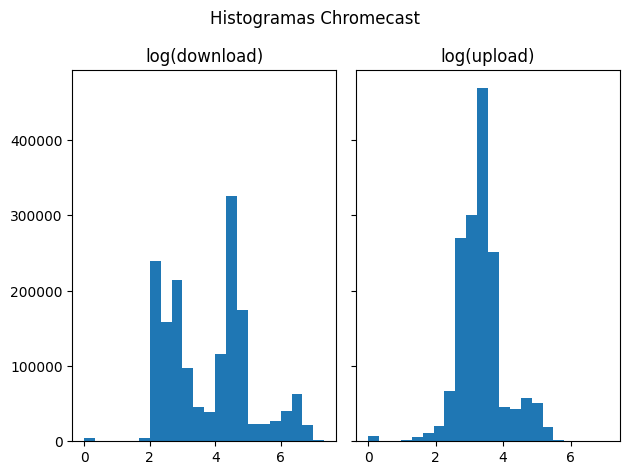

In [114]:
# print(len(df_chromecast))

n_bins = int(np.ceil(np.log2(len(df_chromecast)) + 1))

fig, ax = plt.subplots(1, 2, sharey=True, tight_layout=True)
fig.suptitle('Histogramas Chromecast')

# We can set the number of bins with the *bins* keyword argument.
ax[0].hist(df_chromecast['log(bytes_down)'], bins=n_bins)
ax[0].set_title('log(download)')
ax[1].hist(df_chromecast['log(bytes_up)'], bins=n_bins)
ax[1].set_title('log(upload)')

plt.show()

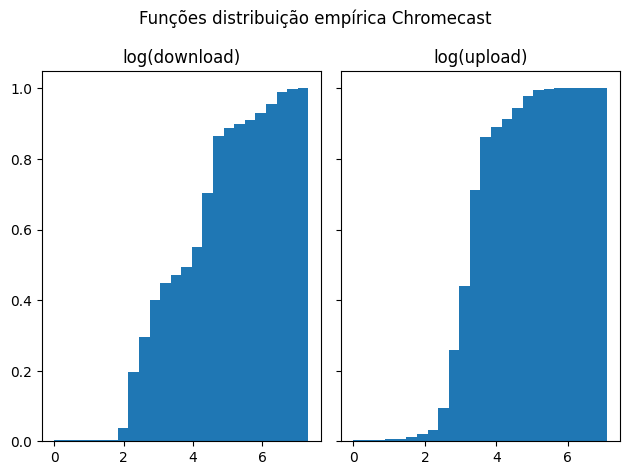

In [134]:
fig, ax = plt.subplots(1, 2, sharey=True, tight_layout=True)
fig.suptitle('Funções distribuição empírica Chromecast')

ax[0].hist(df_chromecast['log(bytes_down)'], bins=n_bins, density=True, cumulative=True)
ax[0].set_title('log(download)')
ax[1].hist(df_chromecast['log(bytes_up)'], bins=n_bins, density=True, cumulative=True)
ax[1].set_title('log(upload)')

plt.show()

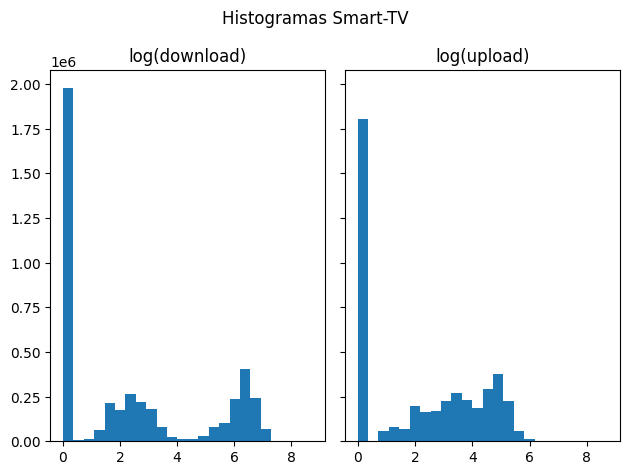

In [116]:
n_bins = int(np.ceil(np.log2(len(df_smart)) + 1))

fig, ax = plt.subplots(1, 2, sharey=True, tight_layout=True)
fig.suptitle('Histogramas Smart-TV')

# We can set the number of bins with the *bins* keyword argument.
ax[0].hist(df_smart['log(bytes_down)'], bins=n_bins)
ax[0].set_title('log(download)')
ax[1].hist(df_smart['log(bytes_up)'], bins=n_bins)
ax[1].set_title('log(upload)')

plt.show()

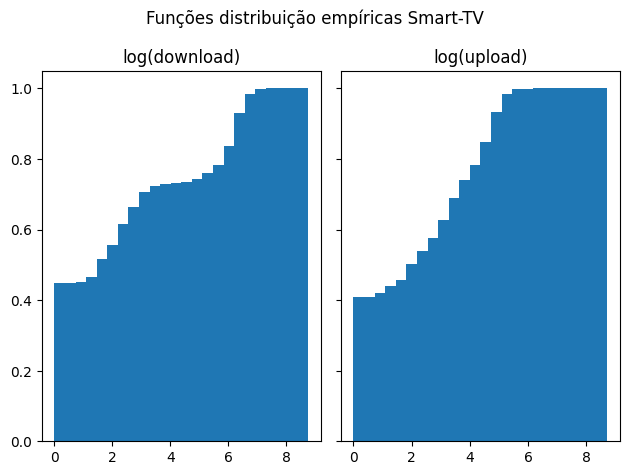

In [135]:
fig, ax = plt.subplots(1, 2, sharey=True, tight_layout=True)
fig.suptitle('Funções distribuição empíricas Smart-TV')

# We can set the number of bins with the *bins* keyword argument.
ax[0].hist(df_smart['log(bytes_down)'], bins=n_bins, density=True, cumulative=True)
ax[0].set_title('log(download)')
ax[1].hist(df_smart['log(bytes_up)'], bins=n_bins, density=True, cumulative=True)
ax[1].set_title('log(upload)')

plt.show()

In [118]:
print('Mediana log(Upload) Chromecast:', np.median(df_chromecast['log(bytes_up)']))
print('Média log(Upload) Chromecast:', np.mean(df_chromecast['log(bytes_up)']))
print('Variância log(Upload) Chromecast:', np.var(df_chromecast['log(bytes_up)']))
print('Desvio padrão log(Upload) Chromecast:', np.std(df_chromecast['log(bytes_up)']))
print()
print('Mediana log(Download) Chromecast:', np.median(df_chromecast['log(bytes_down)']))
print('Média log(Download) Chromecast:', np.mean(df_chromecast['log(bytes_down)']))
print('Variância log(Download) Chromecast:', np.var(df_chromecast['log(bytes_down)']))
print('Desvio padrão log(Download) Chromecast:', np.std(df_chromecast['log(bytes_down)']))
print()
print('Mediana log(Upload) Smart-TV:', np.median(df_smart['log(bytes_up)']))
print('Média log(Upload) Smart-TV:', np.mean(df_smart['log(bytes_up)']))
print('Variância log(Upload) Smart-TV:', np.var(df_smart['log(bytes_up)']))
print('Desvio padrão log(Upload) Smart-TV:', np.std(df_smart['log(bytes_up)']))
print()
print('Mediana log(Download) Smart-TV:', np.median(df_smart['log(bytes_down)']))
print('Média log(Download) Smart-TV:', np.mean(df_smart['log(bytes_down)']))
print('Variância log(Download) Smart-TV:', np.var(df_smart['log(bytes_down)']))
print('Desvio padrão log(Download) Smart-TV:', np.std(df_smart['log(bytes_down)']))

Mediana log(Upload) Chromecast: 3.3322768318966562
Média log(Upload) Chromecast: 3.349675413430672
Variância log(Upload) Chromecast: 0.46157308740940867
Desvio padrão log(Upload) Chromecast: 0.679391703959806

Mediana log(Download) Chromecast: 4.025004857901128
Média log(Download) Chromecast: 3.7993358118948497
Variância log(Download) Chromecast: 1.6659761558474664
Desvio padrão log(Download) Chromecast: 1.2907269873398737

Mediana log(Upload) Smart-TV: 2.161567631970461
Média log(Upload) Smart-TV: 2.1565944549925273
Variância log(Upload) Smart-TV: 4.113060089086157
Desvio padrão log(Upload) Smart-TV: 2.0280680681589947

Mediana log(Download) Smart-TV: 1.6497743962864664
Média log(Download) Smart-TV: 2.3501773789320954
Variância log(Download) Smart-TV: 6.723892922997081
Desvio padrão log(Download) Smart-TV: 2.593047034474516


In [119]:
df_chromecast['date_hour'] =  pd.to_datetime(df_chromecast['date_hour'])
df_chromecast.index = df_chromecast['date_hour']
df_smart['date_hour'] =  pd.to_datetime(df_smart['date_hour'])
df_smart.index = df_smart['date_hour']
# print(df_chromecast.between_time('3:00', '4:00'))

times = ['0:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00', '0:00']



In [151]:
def draw_boxplots(data, title):
    random_dists = times[:-1]

    fig, ax1 = plt.subplots(figsize=(6, 4))
    fig.canvas.manager.set_window_title('Boxplot das taxas de transferência')
    fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

    bp = ax1.boxplot(data, notch=False, sym='+', vert=True, whis=1.5)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+')

    # Add a horizontal grid to the plot, but make it very light in color
    # so we can use it for reading data values but not be distracting
    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                alpha=0.5)

    ax1.set(
        axisbelow=True,  # Hide the grid behind plot objects
        title=title,
        xlabel='Distribuição',
        ylabel='Log10 das taxas',
    )

    # Now fill the boxes with desired colors
    box_colors = ['darkkhaki', 'royalblue']
    num_boxes = len(data)
    medians = np.empty(num_boxes)
    for i in range(num_boxes):
        box = bp['boxes'][i]
        box_x = []
        box_y = []
        for j in range(5):
            box_x.append(box.get_xdata()[j])
            box_y.append(box.get_ydata()[j])
        box_coords = np.column_stack([box_x, box_y])
        # Alternate between Dark Khaki and Royal Blue
        ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % 2]))
        # Now draw the median lines back over what we just filled in
        med = bp['medians'][i]
        median_x = []
        median_y = []
        for j in range(2):
            median_x.append(med.get_xdata()[j])
            median_y.append(med.get_ydata()[j])
            ax1.plot(median_x, median_y, 'k')
        medians[i] = median_y[0]
        # Finally, overplot the sample averages, with horizontal alignment
        # in the center of each box
        ax1.plot(np.average(med.get_xdata()), np.average(data[i]),
                color='w', marker='*', markeredgecolor='k')

    # Set the axes ranges and axes labels
    ax1.set_xlim(0.5, num_boxes + 0.5)
    top = 10
    bottom = -1
    ax1.set_ylim(bottom, top)
    ax1.set_xticklabels(random_dists,
                        rotation=45, fontsize=8)

    # Due to the Y-axis scale being different across samples, it can be
    # hard to compare differences in medians across the samples. Add upper
    # X-axis tick labels with the sample medians to aid in comparison
    # (just use two decimal places of precision)
    # pos = np.arange(num_boxes) + 1
    # upper_labels = [str(round(s, 2)) for s in medians]
    # weights = ['bold', 'semibold']
    # for tick, label in zip(range(num_boxes), ax1.get_xticklabels()):
    #     k = tick % 2
    #     ax1.text(pos[tick], .95, upper_labels[tick],
    #              transform=ax1.get_xaxis_transform(),
    #              horizontalalignment='center', size='x-small',
    #              weight=weights[k], color=box_colors[k])

    # Finally, add a basic legend
    fig.text(0.80, 0.015, '*', color='black', weight='roman', size='medium')
    fig.text(0.815, 0.013, ' Média', color='black', weight='roman', size='x-small')

    plt.show()

def draw_all_boxplots(df, nome):

    # Generate some random indices that we'll use to resample the original data
    # arrays. For code brevity, just use the same random indices for each array
    data = []
    for i in range(len(times)-1):
        aux = df.between_time(times[i], times[i+1], 'left')
        data.append(aux['log(bytes_up)'])

    draw_boxplots(data, 'Upload por hora ' + nome)
    data = []
    for i in range(len(times)-1):
        aux = df.between_time(times[i], times[i+1], 'left')
        data.append(aux['log(bytes_down)'])

    draw_boxplots(data, 'Download por hora ' + nome)


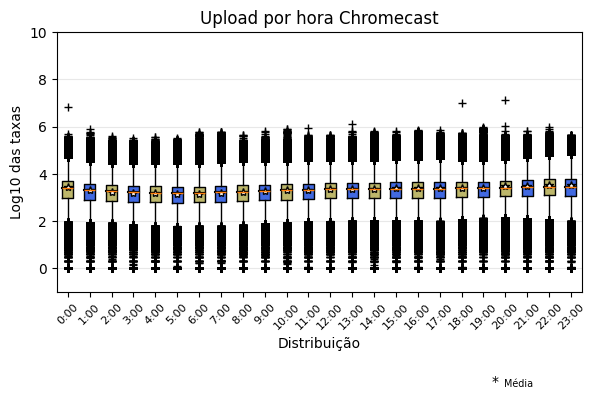

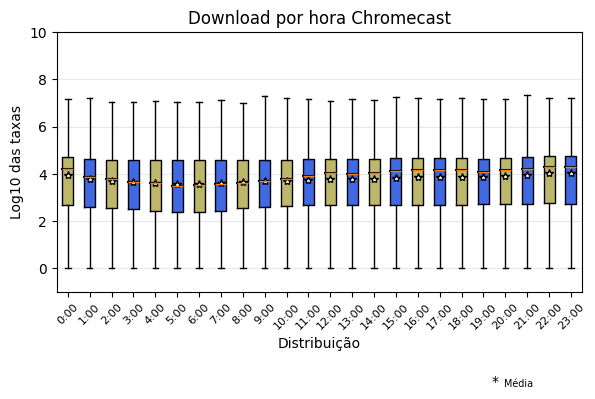

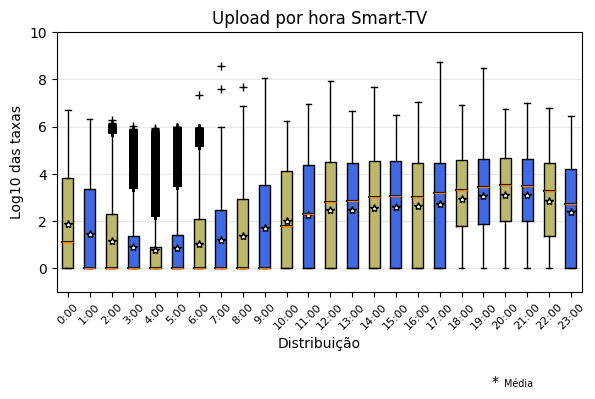

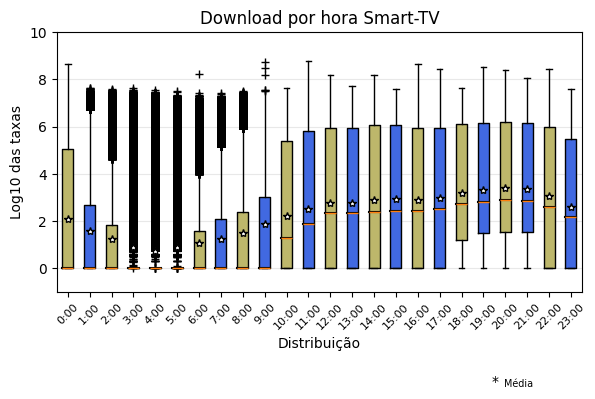

In [152]:
draw_all_boxplots(df_chromecast, 'Chromecast')
draw_all_boxplots(df_smart, 'Smart-TV')

C:\Users\alech\AppData\Local\Temp\ipykernel_992\2685245234.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(times[:-1], rotation=45, fontsize=8)


Chromecast max of log(bytes_up) 22:00


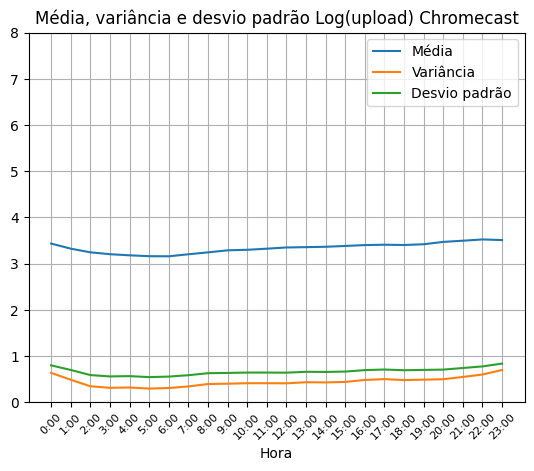

C:\Users\alech\AppData\Local\Temp\ipykernel_992\2685245234.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(times[:-1], rotation=45, fontsize=8)


Chromecast max of log(bytes_down) 23:00


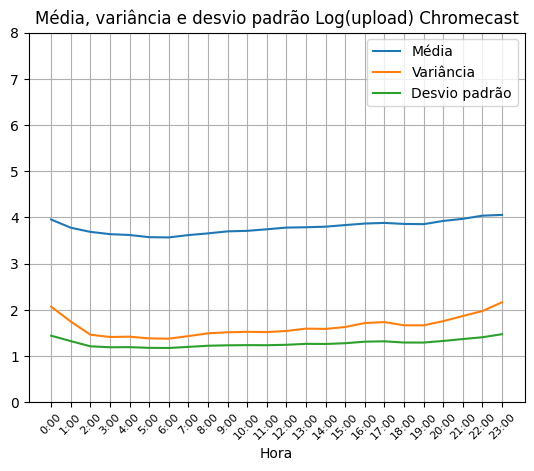

C:\Users\alech\AppData\Local\Temp\ipykernel_992\2685245234.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(times[:-1], rotation=45, fontsize=8)


Smart-TV max of log(bytes_up) 20:00


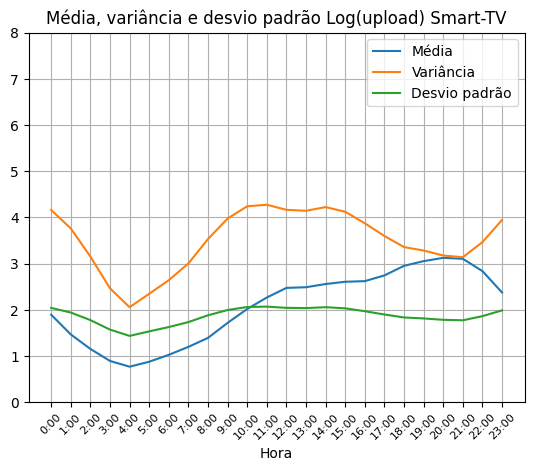

C:\Users\alech\AppData\Local\Temp\ipykernel_992\2685245234.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(times[:-1], rotation=45, fontsize=8)


Smart-TV max of log(bytes_down) 20:00


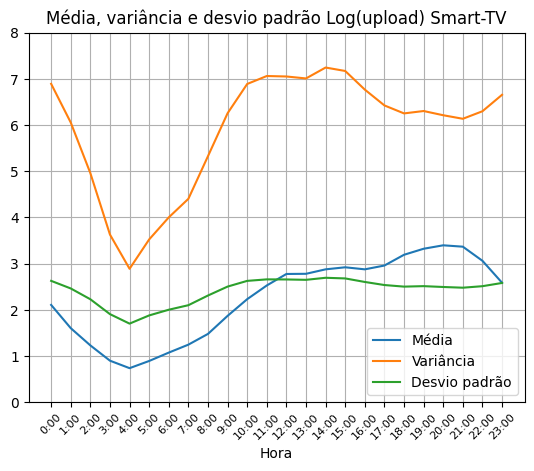

In [153]:
def func(df, series, name):
  means = np.array([np.mean(df.between_time(times[i], times[i+1], 'left')[series]) for i in range(len(times)-1)])
  variances = np.array([np.var(df.between_time(times[i], times[i+1], 'left')[series]) for i in range(len(times)-1)])
  stds = np.array([np.std(df.between_time(times[i], times[i+1], 'left')[series]) for i in range(len(times)-1)])
  fig, ax = plt.subplots()
  ax.plot(times[:-1], means, label='Média')
  ax.plot(times[:-1], variances, label='Variância')
  ax.plot(times[:-1], stds, label='Desvio padrão')
  ax.set_xticklabels(times[:-1], rotation=45, fontsize=8)
  ax.set(xlabel='Hora',
        title='Média, variância e desvio padrão Log(upload) ' + name)
  ax.grid()
  ax.legend()
  ax.set_ylim(0, 8)
  print(name, 'max of', series, times[means.argmax()])


  plt.show()

func(df_chromecast, 'log(bytes_up)', 'Chromecast')
func(df_chromecast, 'log(bytes_down)', 'Chromecast')

func(df_smart, 'log(bytes_up)', 'Smart-TV')
func(df_smart, 'log(bytes_down)', 'Smart-TV')

In [155]:
df_chromecast_max_upload = df_chromecast.between_time('22:00', '23:00', 'left')
df_chromecast_max_download = df_chromecast.between_time('23:00', '00:00', 'left')
df_smart_max_upload = df_smart.between_time('20:00', '21:00', 'left')
df_smart_max_download = df_smart.between_time('20:00', '21:00', 'left')


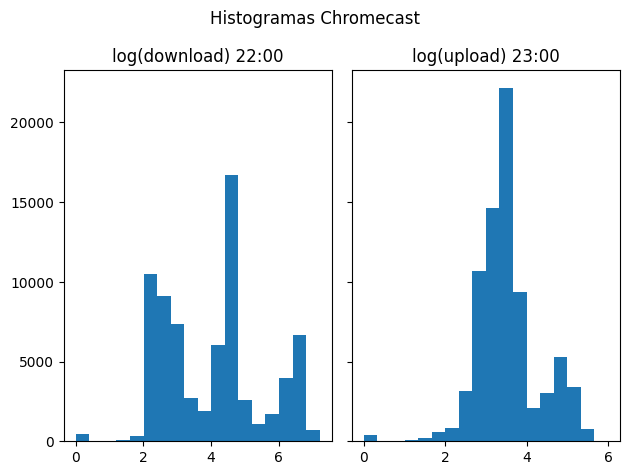

In [161]:
fig, ax = plt.subplots(1, 2, sharey=True, tight_layout=True)
fig.suptitle('Histogramas Chromecast')

# We can set the number of bins with the *bins* keyword argument.
n_bins = int(np.ceil(np.log2(len(df_chromecast_max_download)) + 1))
ax[0].hist(df_chromecast_max_download['log(bytes_down)'], bins=n_bins)
ax[0].set_title('log(download) 22:00')
n_bins = int(np.ceil(np.log2(len(df_chromecast_max_upload)) + 1))
ax[1].hist(df_chromecast_max_upload['log(bytes_up)'], bins=n_bins)
ax[1].set_title('log(upload) 23:00')

plt.show()

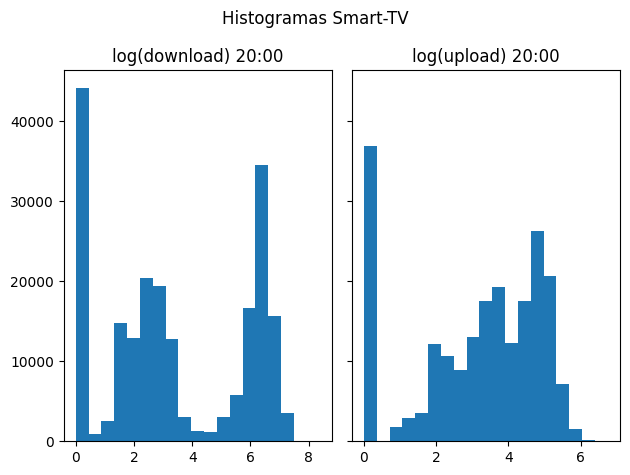

In [162]:
fig, ax = plt.subplots(1, 2, sharey=True, tight_layout=True)
fig.suptitle('Histogramas Smart-TV')

# We can set the number of bins with the *bins* keyword argument.
n_bins = int(np.ceil(np.log2(len(df_smart_max_download)) + 1))
ax[0].hist(df_smart_max_download['log(bytes_down)'], bins=n_bins)
ax[0].set_title('log(download) 20:00')
n_bins = int(np.ceil(np.log2(len(df_smart_max_upload)) + 1))
ax[1].hist(df_smart_max_upload['log(bytes_up)'], bins=n_bins)
ax[1].set_title('log(upload) 20:00')

plt.show()

71848 212608


C:\Users\alech\AppData\Local\Temp\ipykernel_992\1891473898.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(sorted(df_chromecast_max_download['log(bytes_down)']), sorted(df_smart_max_download['log(bytes_down)'][idx]))


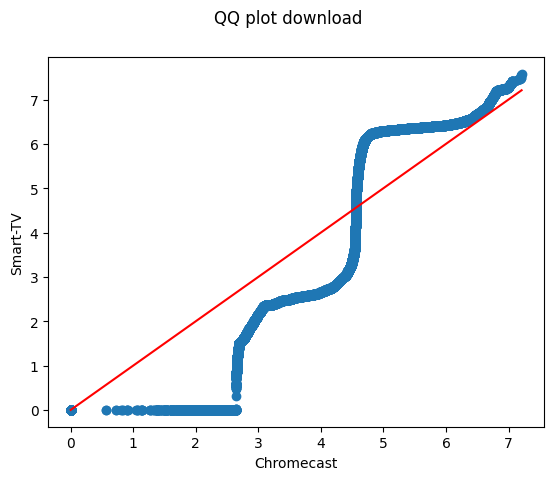

In [202]:
max_len = max(len(df_chromecast_max_download['log(bytes_down)']), len(df_smart_max_download['log(bytes_down)']))
min_len = min(len(df_chromecast_max_download['log(bytes_down)']), len(df_smart_max_download['log(bytes_down)']))

idx = np.round(np.linspace(0, max_len - 1, min_len)).astype(int)

print(len(df_chromecast_max_download['log(bytes_down)']), len(df_smart_max_download['log(bytes_down)']))
fig, ax = plt.subplots()

plt.scatter(sorted(df_chromecast_max_download['log(bytes_down)']), sorted(df_smart_max_download['log(bytes_down)'][idx]))
plt.plot([min(df_chromecast_max_download['log(bytes_down)']),max(df_chromecast_max_download['log(bytes_down)'])],[min(df_chromecast_max_download['log(bytes_down)']),max(df_chromecast_max_download['log(bytes_down)'])],color="red")
plt.xlabel("Chromecast")
plt.ylabel("Smart-TV")
plt.suptitle('QQ plot download')


plt.show()

76738 212608


C:\Users\alech\AppData\Local\Temp\ipykernel_992\2905812977.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(sorted(df_chromecast_max_upload['log(bytes_up)']), sorted(df_smart_max_upload['log(bytes_up)'][idx]))


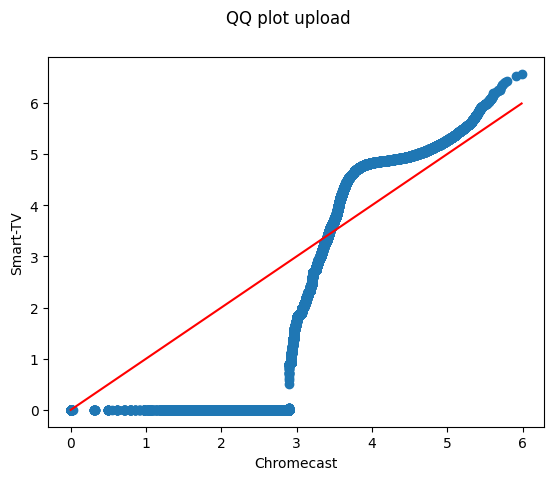

In [204]:
max_len = max(len(df_chromecast_max_upload['log(bytes_up)']), len(df_smart_max_upload['log(bytes_up)']))
min_len = min(len(df_chromecast_max_upload['log(bytes_up)']), len(df_smart_max_upload['log(bytes_up)']))

idx = np.round(np.linspace(0, max_len - 1, min_len)).astype(int)

print(len(df_chromecast_max_upload['log(bytes_up)']), len(df_smart_max_upload['log(bytes_up)']))
fig, ax = plt.subplots()

plt.scatter(sorted(df_chromecast_max_upload['log(bytes_up)']), sorted(df_smart_max_upload['log(bytes_up)'][idx]))
plt.plot([min(df_chromecast_max_upload['log(bytes_up)']),max(df_chromecast_max_upload['log(bytes_up)'])],[min(df_chromecast_max_upload['log(bytes_up)']),max(df_chromecast_max_upload['log(bytes_up)'])],color="red")
plt.xlabel("Chromecast")
plt.ylabel("Smart-TV")
plt.suptitle('QQ plot upload')


plt.show()

71848 76738


C:\Users\alech\AppData\Local\Temp\ipykernel_992\2392442474.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(sorted(df_chromecast_max_download['log(bytes_down)']), sorted(df_chromecast_max_upload['log(bytes_up)'][idx]))


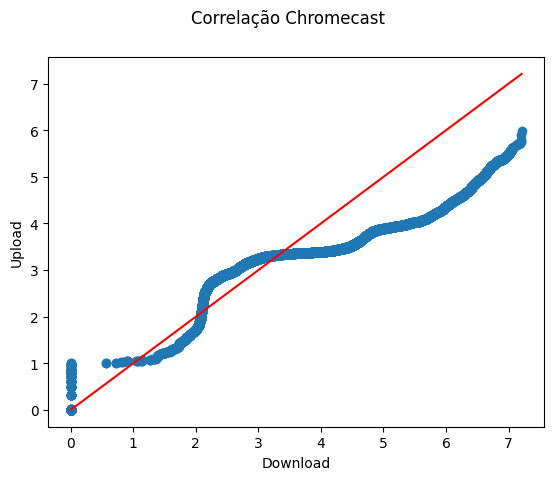

In [205]:
max_len = max(len(df_chromecast_max_download['log(bytes_down)']), len(df_chromecast_max_upload['log(bytes_up)']))
min_len = min(len(df_chromecast_max_download['log(bytes_down)']), len(df_chromecast_max_upload['log(bytes_up)']))

idx = np.round(np.linspace(0, max_len - 1, min_len)).astype(int)

print(len(df_chromecast_max_download['log(bytes_down)']), len(df_chromecast_max_upload['log(bytes_up)']))
fig, ax = plt.subplots()

plt.scatter(sorted(df_chromecast_max_download['log(bytes_down)']), sorted(df_chromecast_max_upload['log(bytes_up)'][idx]))
plt.plot([min(df_chromecast_max_download['log(bytes_down)']),max(df_chromecast_max_download['log(bytes_down)'])],[min(df_chromecast_max_download['log(bytes_down)']),max(df_chromecast_max_download['log(bytes_down)'])],color="red")
plt.xlabel("Download")
plt.ylabel("Upload")
plt.suptitle('Correlação Chromecast')


plt.show()

212608 212608


C:\Users\alech\AppData\Local\Temp\ipykernel_992\1733240336.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(sorted(df_smart_max_download['log(bytes_down)']), sorted(df_smart_max_upload['log(bytes_up)'][idx]))


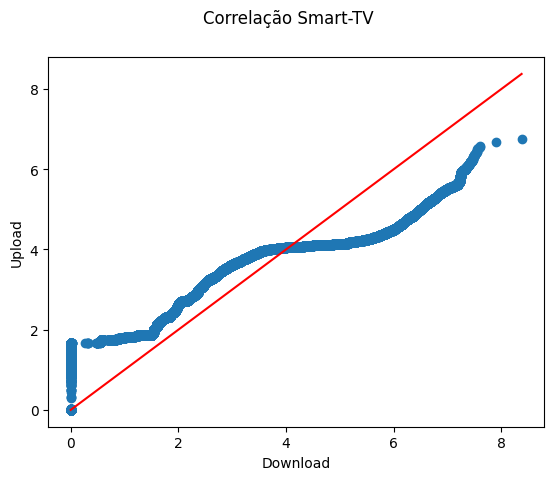

In [208]:
max_len = max(len(df_smart_max_download['log(bytes_down)']), len(df_smart_max_upload['log(bytes_up)']))
min_len = min(len(df_smart_max_download['log(bytes_down)']), len(df_smart_max_upload['log(bytes_up)']))

idx = np.round(np.linspace(0, max_len - 1, min_len)).astype(int)
print(len(df_smart_max_download['log(bytes_down)']), len(df_smart_max_upload['log(bytes_up)']))
fig, ax = plt.subplots()

plt.scatter(sorted(df_smart_max_download['log(bytes_down)']), sorted(df_smart_max_upload['log(bytes_up)'][idx]))
plt.plot([min(df_smart_max_download['log(bytes_down)']),max(df_smart_max_download['log(bytes_down)'])],[min(df_smart_max_download['log(bytes_down)']),max(df_smart_max_download['log(bytes_down)'])],color="red")
plt.xlabel("Download")
plt.ylabel("Upload")
plt.suptitle('Correlação Smart-TV')


plt.show()